In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io      #read/write images

In [2]:
np.random.seed(42)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [3]:
class KMeans():
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
                
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()

    def cent(self):
        return self.centroids

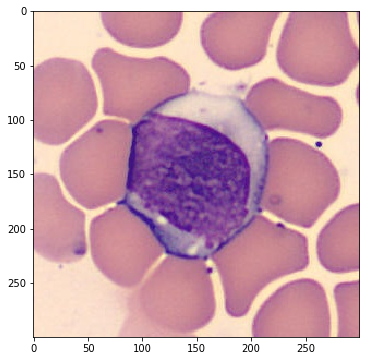

In [4]:
image = io.imread("002.bmp")
plt.figure(figsize=(6, 6))
plt.imshow(image)

In [5]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(90000, 3)


In [7]:
k = KMeans(K=3, max_iters=10)  
y_pred = k.predict(pixel_values) 
print(k.cent())

[[247.23205566 219.86552429 195.88447571]
 [196.2243042  133.79238892 152.06066895]
 [113.96977997  62.09828568 143.61491394]]


In [8]:
centers = np.uint8(k.cent())
centers

array([[247, 219, 195],
       [196, 133, 152],
       [113,  62, 143]], dtype=uint8)

In [9]:
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [10]:
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

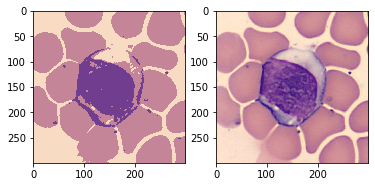

In [11]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.subplot(1, 2, 1)
plt.imshow(segmented_image)

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.show()

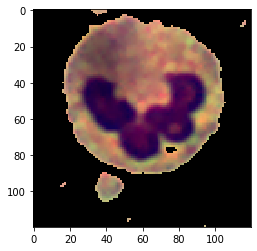

In [32]:
masked_image = np.copy(image)
masked_image = masked_image.reshape((-1, 3))
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
masked_image = masked_image.reshape(image.shape)
plt.imshow(masked_image)
plt.show()